In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
df = pd.read_csv('outlier_treated.csv')

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,650.0,0,0,0,0,0,0,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,1103.0,1,1,0,0,0,0,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,1000.0,585.0,0,0,0,0,0,0,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,NaN,532.0,0,0,1,0,0,0,159,266.000000


In [9]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,650.0,0,0,0,0,0,0,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,1103.0,1,1,0,0,0,0,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,1000.0,585.0,0,0,0,0,0,0,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,NaN,532.0,0,0,1,0,0,0,159,266.000000


In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1021
agePossession             0
super_built_up_area    1693
built_up_area          1973
carpet_area            1723
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [10]:
df=df[df['area_room_ratio']>100]

In [11]:
outliers_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

In [12]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum']) 

C:\Users\sonal\AppData\Local\Temp\ipykernel_26484\1007827289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [13]:
df.update(outliers_df)

In [14]:
df['area_room_ratio'] = df['area']/df['bedRoom'] 


C:\Users\sonal\AppData\Local\Temp\ipykernel_26484\2089348434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [15]:
df[(df['area_room_ratio']<250 )&(df['bedRoom']>4)] 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
86,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,...,NaN,900.0,0,0,0,0,0,0,0,150.000000
370,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,...,NaN,1000.0,0,0,0,0,0,0,0,166.666667
1064,house,independent,sector 5,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,...,NaN,900.0,0,0,0,0,0,0,0,180.000000
1161,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,...,NaN,110.0,0,0,0,0,0,0,0,198.000000
1660,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,...,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1841,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,...,1782.0,NaN,0,0,0,0,0,0,0,222.750000
2648,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,...,NaN,120.0,0,0,0,0,0,0,0,120.000000
2964,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,...,67.0,NaN,0,0,0,1,0,0,29,120.600000
3058,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,...,1200.0,NaN,0,0,0,0,0,0,0,150.000000
3137,house,independent,sector 5,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,...,1100.0,900.0,0,0,0,0,0,0,0,220.000000


In [16]:
df[(df['area_room_ratio']<250 )&(df['bedRoom']>4)] .shape

(11, 24)

In [18]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]


C:\Users\sonal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


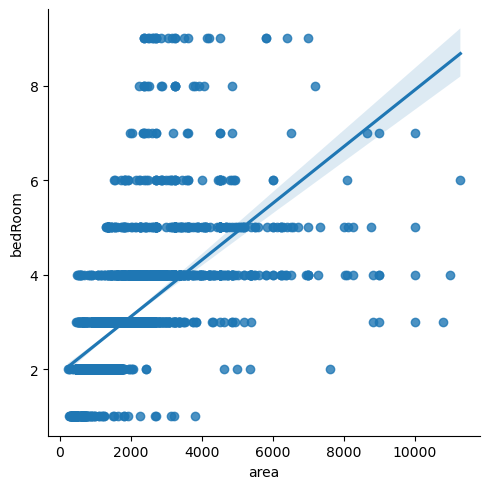

In [19]:
sns.lmplot(data = df , x = 'area' , y = 'bedRoom')

In [20]:
df.shape

(3537, 24)

In [27]:
df.to_csv('outlier_treate.csv' , index = False)